In [1]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import os
import numpy as np
from numpy import genfromtxt

from deepSI import System_data

c:\Users\20173928\Miniconda3\envs\sindy\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
DATA_PATH = r"C:\Users\20173928\OneDrive - TU Eindhoven\Documents\Master\thesis\mscth\data\\"

WIENER = "WienerHammerBenchmark"
SILVER = "SNLS80mV"
# SILVER = "Schroeder80mV"
# change data set
DATA = SILVER
CSV = ".csv"

PATH = os.path.join(DATA_PATH, DATA+CSV)

# load data
data = genfromtxt(PATH, delimiter=",")

data = data[1:,:-1] # snl

In [3]:
# data
V1 = data[:,0]
V2 = data[:,1]

N = V1.shape[0]
fs = 610.35
dt = 1/fs
t = np.linspace(0,dt*(N-1),N)

In [4]:
silver_data = System_data(u=V1,y=V2)
train, _ = silver_data.train_test_split(split_fraction=0)

samples = train.u.shape[0]
y0 = [train.y[0], 0]

C:\Users\20173928\AppData\Local\Temp\ipykernel_11164\202323891.py:17: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  y_hat = odeint(silverbox, y0=y0, t=k)


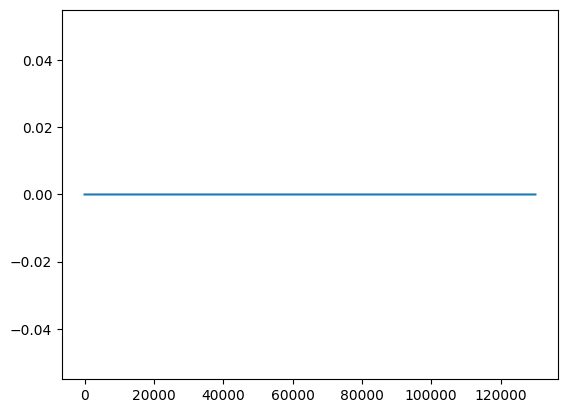

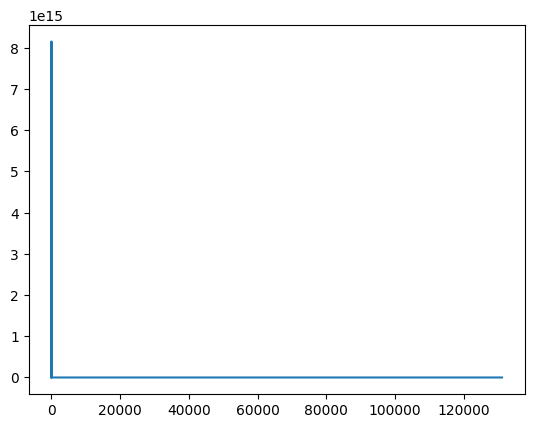

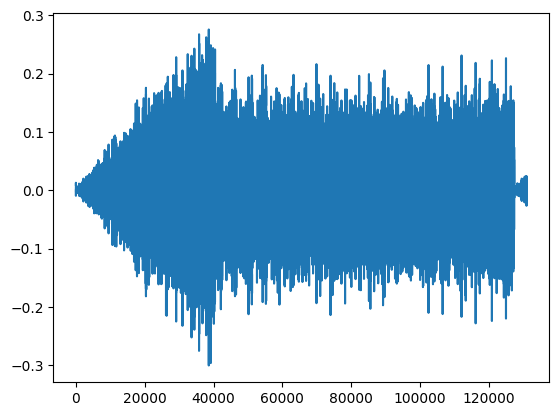

In [7]:
# initialize system's parameters
a1 = 0.0012  #-0.764  # 0.443
a2 = 0.0048  #-0.892  #-0.691
a3 = 0.0013  # 0.797  # 1.407
b1 = 0.0073  # 0.201  # 0.314

k = np.arange(0,samples,1)

def silverbox(x, t):
    x1 = x[0]
    x2 = x[1]
    dx1 = x2
    dx2 = a1*x2 + a2*x1 + a3*(x1**3) + b1*train.u[int(t)]
    return [dx1, dx2]

# y0 is our initial state
y_hat = odeint(silverbox, y0=y0, t=k)

plt.plot(y_hat[:,0])
plt.show()
plt.plot(y_hat[:,1])
plt.show()
plt.plot(train.y)
plt.show()


In [ ]:
def discrete_silver():


In [6]:
x1 = y_hat[:,0]
x2 = y_hat[:,1]
u = train.u

# data = np.stack((x1, x2, u), axis=-1)
# np.savetxt("data\\OG"+str(round(a1,2))+str(round(a2,2))+str(round(a3,2))+str(round(b1,2))+".csv", data, delimiter=",")

FileNotFoundError: [Errno 2] No such file or directory: 'data\\OG0.00.00.00.01.csv'